In [1]:
from funcs import *
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<Figure size 640x480 with 0 Axes>

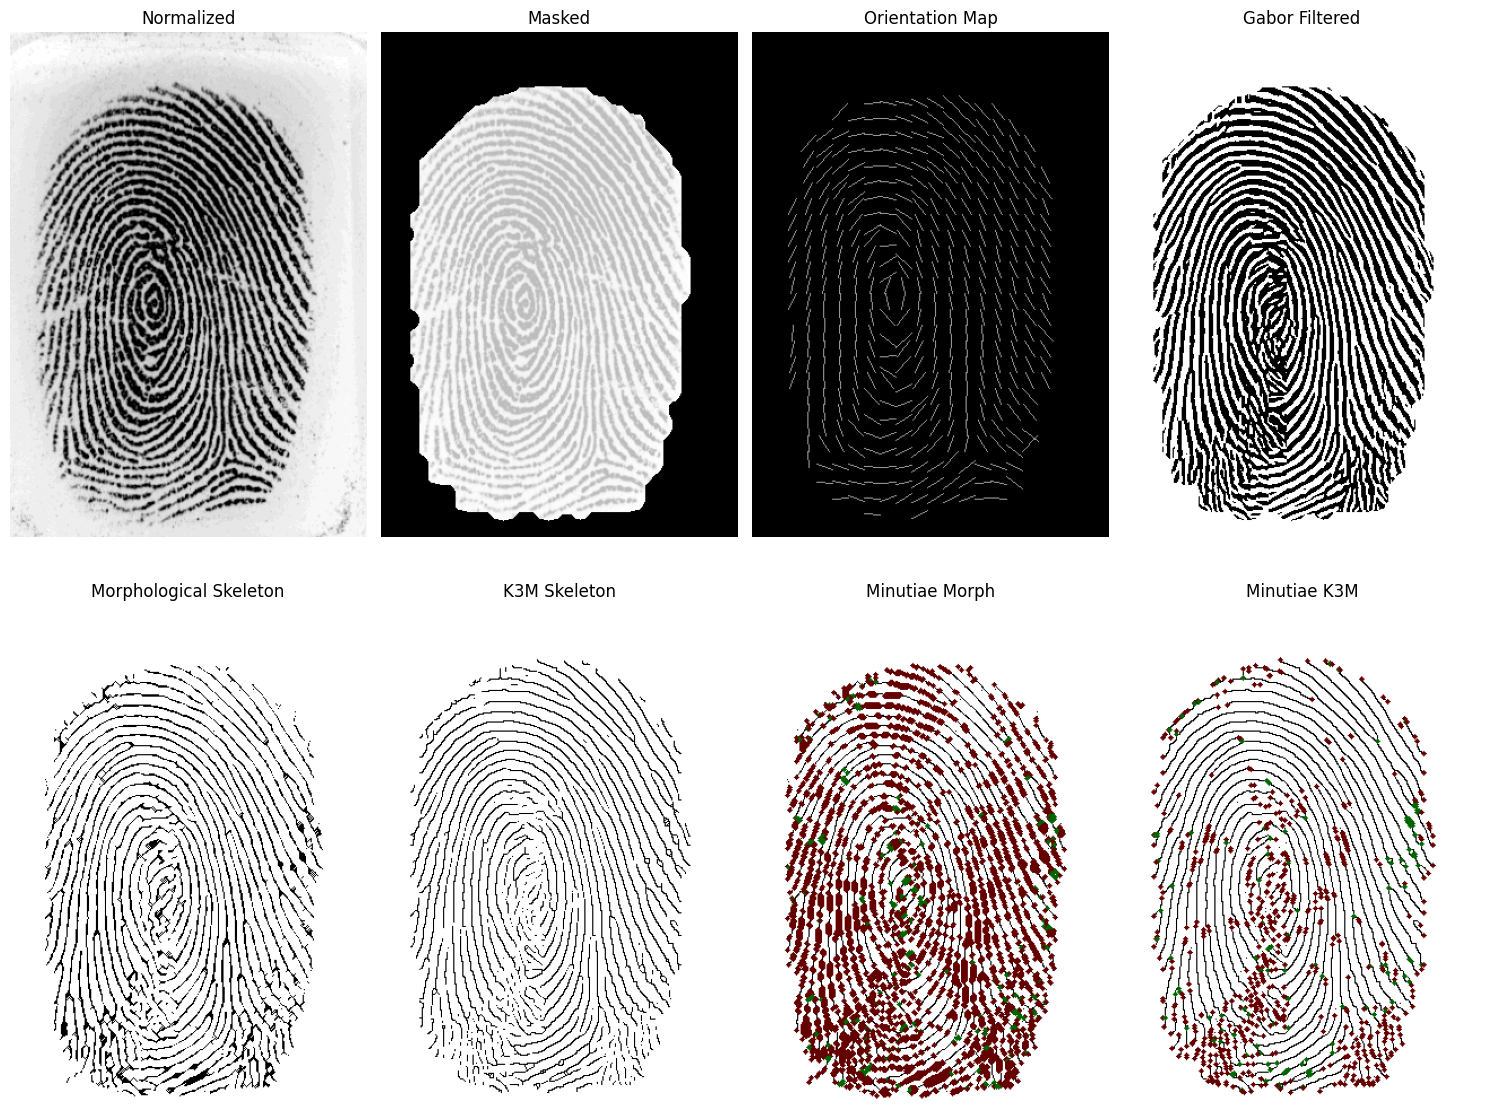

In [2]:
#for finger in ['p34', 'p31', 'p21', 'l33', 'l25', 'l23']:
# finger = 'p34'
# print(f'Finger: {finger}')

# load the image and normalize
#img = np.array(cv.imread(f'./data/{finger}.bmp',0))
img = np.array(cv.imread(f'./data/test.png',0))
normalized = normalize_image(img)

# segment and normalize the image
masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 

# orientation estimation and rendering
orient = estimate_orientation_map(normalized, 14)
orient_render = render_orientation_lines(masked, mask, orient, 14)

# ridge frequency estimation and Gabor filtering
ridge_freq = ridge_frequency(normalized_2, mask, orient)
gabor = gabor_filter(normalized_2, orient, ridge_freq)

# skeletonization
skeleton_morph = morphological_skeleton(gabor)
skeleton_k3m = k3m_skeleton(gabor, mask)

# minutiae
minutiae_morph = extract_minutiae(skeleton_morph)
minutiae_k3m = extract_minutiae(skeleton_k3m)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(2, 4, 1)
plt.title("Normalized")
plt.imshow(normalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked")
plt.imshow(masked, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Orientation Map")
plt.imshow(orient_render, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Gabor Filtered")
plt.imshow(gabor, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Morphological Skeleton")
plt.imshow(skeleton_morph, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("K3M Skeleton")
plt.imshow(skeleton_k3m, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Minutiae Morph")
plt.imshow(minutiae_morph, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Minutiae K3M")
plt.imshow(minutiae_k3m, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()